In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('./merged 데이터 20240122', index_col=0)
df.tail()

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score
7748,스포츠/용품,아우터,나일론 아노락 자켓 - 블랙 / 2033B427-001,2033B427-001,0,1,0,0.0,"('24~28세', 0)",2100.0,1275,87200.0,20,4.0,4.9,222,300.0,0.987500
7749,아우터,패딩 베스트,라이트 덕다운 패딩 베스트 [브라운],TMPD512340BR,0,0,0,NaN,"('~18세', 0)",1200.0,112,187000.0,0,5.0,5.0,2,NaN,1.000000
7750,아우터,패딩 베스트,[MENS] 리버서블 패딩 조끼(10 color),HBA-VT-M201,0,0,0,0.0,"('34~39세', 0)",1400.0,198,38400.0,60,5.0,4.8,33,100.0,0.976190
7751,아우터,숏패딩/숏헤비 아우터,숏 미니멀 덕다운 패딩 블랙,3001,0,1,0,0.0,"('29~33세', 0)",3300.0,2028,238400.0,20,7.0,4.8,87,100.0,0.988095
7752,아우터,아노락 재킷,Pocket Tidy Hood Anorak H7 Navy/Green,409,1,0,2,1.0,"('34~39세', 0)",400.0,368,53000.0,40,5.0,5.0,22,50.0,0.947368


In [4]:
df.shape

(7753, 18)

In [5]:
# df = df.drop_duplicates()

In [6]:
df.isnull().sum()

major_category        0
middle_category       0
name                  0
number                0
limit                 0
exclusive             0
target_gender         0
buy_gender         2275
buy_age               0
view                388
like                  0
price                 0
discount_rate         0
delivery_date        11
rating              995
review                0
buy                2351
score               969
dtype: int64



---



## 상의-스포츠/용품 위치 바꾸기

In [7]:
df.loc[df.middle_category == '상의', 'major_category'] = '상의'

In [8]:
df.loc[df.middle_category == '상의','middle_category'] = '스포츠/용품'

In [9]:
df.loc[df.middle_category == '아우터', 'major_category'] = '아우터'
df.loc[df.middle_category == '아우터','middle_category'] = '스포츠/용품'

## 중복행 제거

In [10]:
df = df.drop_duplicates(keep='first', ignore_index=True)
df.tail()

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score
7746,아우터,스포츠/용품,나일론 아노락 자켓 - 블랙 / 2033B427-001,2033B427-001,0,1,0,0.0,"('24~28세', 0)",2100.0,1275,87200.0,20,4.0,4.9,222,300.0,0.987500
7747,아우터,패딩 베스트,라이트 덕다운 패딩 베스트 [브라운],TMPD512340BR,0,0,0,NaN,"('~18세', 0)",1200.0,112,187000.0,0,5.0,5.0,2,NaN,1.000000
7748,아우터,패딩 베스트,[MENS] 리버서블 패딩 조끼(10 color),HBA-VT-M201,0,0,0,0.0,"('34~39세', 0)",1400.0,198,38400.0,60,5.0,4.8,33,100.0,0.976190
7749,아우터,숏패딩/숏헤비 아우터,숏 미니멀 덕다운 패딩 블랙,3001,0,1,0,0.0,"('29~33세', 0)",3300.0,2028,238400.0,20,7.0,4.8,87,100.0,0.988095
7750,아우터,아노락 재킷,Pocket Tidy Hood Anorak H7 Navy/Green,409,1,0,2,1.0,"('34~39세', 0)",400.0,368,53000.0,40,5.0,5.0,22,50.0,0.947368


In [11]:
df.isnull().sum()

major_category        0
middle_category       0
name                  0
number                0
limit                 0
exclusive             0
target_gender         0
buy_gender         2274
buy_age               0
view                388
like                  0
price                 0
discount_rate         0
delivery_date        11
rating              995
review                0
buy                2350
score               969
dtype: int64

## Null값 처리

### buy의 Null값 처리
- 평점이 0, 조회수가 0이어도, 조회수가 200 이하인 상품은 buy가 NaN이어도 유지함
- 정말 안 팔려서 NaN으로 수집된 아이템으로 고려
- 그 외 NaN값은 drop

-> 처리 결과 20개 정도만 남음

In [12]:
bool1 = df.rating.isnull()
bool2 = df.review == 0
bool3 = df.view < 200
bool4 = df.buy.isnull()
df.loc[(bool1 & bool2)&  bool3 &bool4, 'buy'] = 0

In [13]:
df.dropna(subset=['buy'], inplace=True)

In [14]:
df.isnull().sum()

major_category      0
middle_category     0
name                0
number              0
limit               0
exclusive           0
target_gender       0
buy_gender         63
buy_age             0
view                5
like                0
price               0
discount_rate       0
delivery_date       4
rating             91
review              0
buy                 0
score              83
dtype: int64

### buy_gender Null값 처리
- target_gender값과 동일하게 입력

In [15]:
df.loc[df['buy_gender'].isnull(), 'buy_gender'] = df.loc[df['buy_gender'].isnull(), 'target_gender']

### 나머지 결측값 처리를 위해 데이터 통계량 확인

In [16]:
df.describe()

,limit,exclusive,target_gender,buy_gender,view,like,price,discount_rate,delivery_date,rating,review,buy,score
count,5464.000000,5464.000000,5464.000000,5464.000000,5459.000000,5464.000000,5.464000e+03,5464.000000,5460.000000,5373.000000,5464.000000,5464.000000,5381.000000
mean,0.257321,0.048865,0.784773,0.420205,5888.184649,4090.022877,8.635078e+04,29.480234,5.613736,4.800484,606.032394,1174.798682,0.969538
std,0.437198,0.215606,0.825293,0.496595,17050.635972,11808.298724,9.016765e+04,21.833912,2.766361,0.187410,3463.744067,5905.904890,0.046017
min,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000e+00,0.000000,3.000000,2.300000,0.000000,0.000000,0.375000
25%,0.000000,0.000000,0.000000,0.000000,1400.000000,409.750000,3.890000e+04,10.000000,5.000000,4.700000,16.000000,50.000000,0.955882
50%,0.000000,0.000000,1.000000,0.000000,2400.000000,1028.500000,5.940000e+04,30.000000,5.000000,4.800000,44.000000,100.000000,0.983146
75%,1.000000,0.000000,2.000000,1.000000,4400.000000,2733.750000,1.042500e+05,44.000000,6.000000,4.900000,178.250000,450.000000,1.000000
max,1.000000,1.000000,2.000000,2.000000,560000.000000,243639.000000,2.450000e+06,90.000000,60.000000,5.000000,107179.000000,189000.000000,1.000000


### delivery_date Null값 처리
- max값을 보아 이상치가 있는 것을 확인, 중앙값인 5일로 입력

In [17]:
df.loc[df['delivery_date'].isnull() == True, 'delivery_date'] = 5.0

### rating의 Null값 처리

In [18]:
notzerobuy_df = df.loc[(df['buy'] != 0) & (df['rating'].isnull())]
notzerobuy_df

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score
138,상의,후드 티셔츠,메테오샤워 후드 오트밀 MJHD7698,5004339106,0,0,0,1.0,"('19~23세', 0)",2300.0,442,43900.0,26,5.0,NaN,0,50.0,NaN
174,상의,니트/스웨터,하프 집업 오버핏 케이블 니트 - 6 COLOR,JT68,0,0,2,0.0,"('29~33세', 0)",5700.0,254,34800.0,78,6.0,NaN,0,50.0,NaN
803,상의,긴소매 티셔츠,울U넥 티,78,0,0,1,1.0,"('29~33세', 0)",150.0,92,48000.0,0,5.0,NaN,0,50.0,NaN
1144,바지,트레이닝/조거 팬츠,JORDAN PIGMENT TRACKSUIT PANTS (WHITE),GY23CPT002WH,0,0,1,1.0,"('24~28세', 0)",2100.0,394,108000.0,0,5.0,NaN,0,50.0,NaN
1248,바지,기타 바지,[기모] 나일론 스트링 카고 팬츠 그레이,PY-23176 GY,1,0,0,0.0,"('29~33세', 0)",2000.0,320,31200.0,50,5.0,NaN,0,50.0,NaN
1681,상의,맨투맨/스웨트셔츠,CROP SWEAT BOLERO WHITE MELANGE,CA22DCD001WM,0,0,1,1.0,"('19~23세', 0)",1200.0,2773,42500.0,35,21.0,NaN,115,350.0,0.973684
1682,상의,니트/스웨터,Pakrat Wool Knit Pullover Oatmeal,MDKNDC001OT,1,0,0,1.0,"('19~23세', 0)",2000.0,397,63200.0,20,5.0,NaN,0,50.0,NaN
1754,상의,맨투맨/스웨트셔츠,[세트] 돌핀 자수 엣지 기모 스웻셔츠 조거 트레이닝 팬츠 블랙,134322722BK,0,0,0,1.0,"('40세~', 0)",1400.0,117,79900.0,53,5.0,NaN,0,50.0,NaN
1849,상의,후드 티셔츠,HOME PAINTING PRINTED HOODIE (WHITE),11698,0,0,2,1.0,"('24~28세', 0)",3900.0,616,132300.0,10,7.0,NaN,0,50.0,NaN
1850,상의,맨투맨/스웨트셔츠,UNISEX DUNST LOGO CREASE SWEATSHIRT FRENCH NAV...,UDTS4A103N2,0,0,1,1.0,"('24~28세', 0)",950.0,1683,65550.0,5,7.0,NaN,110,300.0,1.000000


In [19]:
notzerobuy_df.isnull().sum()

major_category      0
middle_category     0
name                0
number              0
limit               0
exclusive           0
target_gender       0
buy_gender          0
buy_age             0
view                0
like                0
price               0
discount_rate       0
delivery_date       0
rating             28
review              0
buy                 0
score              18
dtype: int64

### rating의 Null값 처리
  - buy값이 0이 아니면서 rating이 0인 22개 -> 4.8
  - buy값이 0이면서 rating이 0인 27개 -> 0

In [20]:
df.loc[df['rating'].isnull() == True, 'rating'] = 0.0

for i in notzerobuy_df.index:
  df.loc[i, 'rating'] = 4.8

In [21]:
df.shape

(5464, 18)

### score의 Null값 처리

In [22]:
average_score = df['score'].mean()
df['score'] = df['score'].fillna(average_score)
df.isnull().sum()

major_category     0
middle_category    0
name               0
number             0
limit              0
exclusive          0
target_gender      0
buy_gender         0
buy_age            0
view               5
like               0
price              0
discount_rate      0
delivery_date      0
rating             0
review             0
buy                0
score              0
dtype: int64

### view의 Null값 처리
- RandomForestRegressor 모델을 이용한 예측값 사용
- 여러가지 파라미터 조정 결과
  - Best r2_Score: 0.47624328080184863
  - Best trial parameter {'n_estimators': 281, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.8499303073699949}

In [23]:
# 아래 이상치 발견에 따라 위에서 추가로 전처리를 진행해주었음
df.loc[df.review == 81354, :] = 100000
df = df[df.review < df.buy]
df[df.review >= df.buy]

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score


In [24]:
df.shape

(4931, 18)

In [25]:
df.isnull().sum()

major_category     0
middle_category    0
name               0
number             0
limit              0
exclusive          0
target_gender      0
buy_gender         0
buy_age            0
view               5
like               0
price              0
discount_rate      0
delivery_date      0
rating             0
review             0
buy                0
score              0
dtype: int64

In [26]:
df.shape

(4931, 18)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# DataFrame에서 'view'가 결측치인 행을 제외한 데이터로 모델을 학습시키기 위해 두 개의 서브셋을 생성
train_data = df.dropna(subset=['view'])
predict_data = df[df['view'].isnull()]

# 특성과 타겟을 정의
features = ['score', 'like', 'review', 'price', 'discount_rate', 'rating','delivery_date', 'exclusive', 'limit', 'buy', 'buy_gender', 'target_gender']
target = 'view'

# 학습 데이터셋과 타겟을 설정
X = train_data[features]
y = train_data[target]

#train, test 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

params = {'n_estimators': 281, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.8499303073699949}
model = RandomForestRegressor(**params)

# 학습 데이터셋을 이용하여 모델을 학습
model.fit(X_train, y_train)

# 예측 데이터셋을 이용하여 'view'의 결측치를 예측
predicted_views = model.predict(X_test)

r2_score(y_test, predicted_views)

0.469371840921345

In [28]:
df.isnull().sum()

major_category     0
middle_category    0
name               0
number             0
limit              0
exclusive          0
target_gender      0
buy_gender         0
buy_age            0
view               5
like               0
price              0
discount_rate      0
delivery_date      0
rating             0
review             0
buy                0
score              0
dtype: int64

In [29]:
pred = model.predict(df.loc[df.view.isnull(), ['score', 'like', 'review', 'price', 'discount_rate', 'rating','delivery_date', 'exclusive', 'limit', 'buy', 'buy_gender', 'target_gender']])
df.loc[df['view'].isnull(), 'view'] = pred

In [30]:
df.isnull().sum()

major_category     0
middle_category    0
name               0
number             0
limit              0
exclusive          0
target_gender      0
buy_gender         0
buy_age            0
view               0
like               0
price              0
discount_rate      0
delivery_date      0
rating             0
review             0
buy                0
score              0
dtype: int64

## buy_age 변경
- 동률인 경우가 있기 때문에 buy_age1, buy_age2로 컬럼을 나눔
- 범위를 0,1,2,3,4,5,6으로 구분지어주었음

In [31]:
df.buy_age.unique()
# 1. ~18
# 2. 19~23
# 3. 24~28
# 5. 29~33
# 6. 34~39
# 7. 40~

array(["('29~33세', 0)", "('19~23세', 0)", "('40세~', 0)", "('24~28세', 0)",
       "('19~23세', '24~28세')", "('~18세', 0)", "('34~39세', 0)",
       "('24~28세', '40세~')", "('24~28세', '29~33세')",
       "('19~23세', '29~33세')", "('~18세', '19~23세')", '(0, 0)',
       "('~18세', '24~28세')", "('29~33세', '40세~')", "('34~39세', '40세~')",
       "('19~23세', '40세~')", "('29~33세', '34~39세')", "('~18세', '29~33세')",
       "('~18세', '40세~')", "('24~28세', '34~39세')", "('19~23세', '34~39세')"],
      dtype=object)

In [32]:
import re
numbers = [int(num) for num in re.findall(r'\d+', df.iloc[0, 8])]
numbers

[29, 33, 0]

In [33]:
def age1(row):
  numbers = [int(num) for num in re.findall(r'\d+', row)]
  return numbers[0]

In [34]:
df['buy_age1'] = df['buy_age'].apply(age1)

In [35]:
def age2(row):
  numbers = [int(num) for num in re.findall(r'\d+', row)]
  return numbers[1]

In [36]:
df['buy_age2'] = df['buy_age'].apply(age2)

In [37]:
df.buy_age1.unique()

array([29, 19, 40, 24, 18, 34,  0], dtype=int64)

In [38]:
def age_range(row):
  if row == 40:
    return 6
  elif row == 18:
    return 1
  elif row == 19:
    return 2
  elif row == 24:
    return 3
  elif row == 29:
    return 4
  elif row == 34:
    return 5
  else: return 0

In [39]:
df['buy_age1'] = df['buy_age1'].apply(age_range)
df['buy_age2'] = df['buy_age2'].apply(age_range)

In [40]:
df

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score,buy_age1,buy_age2
0,상의,셔츠/블라우스,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,1,0,2,0.0,"('29~33세', 0)",1200.0,493,39800.0,20,19.0,4.6,36,50.0,0.976190,4,0
1,상의,니트/스웨터,TD5-SW01 램스울 라운드 니트-만다린오렌지,TD5-SW01_MAO,1,0,0,0.0,"('29~33세', 0)",4900.0,650,53550.0,10,5.0,4.9,61,200.0,0.954545,4,0
2,상의,후드 티셔츠,[SET UP] PPP 플라워 후드 셋업_멜란지 그레이,KBCS1TH003MGKBCS1PL003MGKBCS1PS003MG,1,0,2,1.0,"('19~23세', 0)",3600.0,2536,49900.0,49,5.0,4.8,41,150.0,1.000000,2,0
3,상의,후드 티셔츠,TIE DYE 후드티 Olive Green,CTTZPHD01UG4,0,0,0,0.0,"('40세~', 0)",1000.0,569,19800.0,80,5.0,4.8,62,150.0,0.971429,6,0
4,상의,긴소매 티셔츠,essential turtleneck logo top - pink,BT23WTS002PIKF,1,0,1,1.0,"('24~28세', 0)",11000.0,2561,43000.0,0,28.0,4.8,34,100.0,0.964286,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7744,아우터,숏패딩/숏헤비 아우터,다운 숏 푸퍼-블랙,P22FWOT001,0,0,2,0.0,"('19~23세', 0)",2900.0,771,139000.0,43,5.0,4.9,17,50.0,0.964286,2,0
7746,아우터,스포츠/용품,나일론 아노락 자켓 - 블랙 / 2033B427-001,2033B427-001,0,1,0,0.0,"('24~28세', 0)",2100.0,1275,87200.0,20,4.0,4.9,222,300.0,0.987500,3,0
7748,아우터,패딩 베스트,[MENS] 리버서블 패딩 조끼(10 color),HBA-VT-M201,0,0,0,0.0,"('34~39세', 0)",1400.0,198,38400.0,60,5.0,4.8,33,100.0,0.976190,5,0
7749,아우터,숏패딩/숏헤비 아우터,숏 미니멀 덕다운 패딩 블랙,3001,0,1,0,0.0,"('29~33세', 0)",3300.0,2028,238400.0,20,7.0,4.8,87,100.0,0.988095,4,0


In [41]:
df.reset_index(drop=True, inplace=True)

In [42]:
df.to_csv('./무신사_리뷰merge_전처리완료240122.csv')

---

## EDA

In [43]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# import platform
# from matplotlib import font_manager, rc
# import numpy as np

# path = 'c:/Windows/Fonts/malgun.ttf'

# if platform.system() == 'Darwin':
#     rc('font', family = 'AppleGothic')
# elif platform.system() == 'Windows':
#     font_name = font_manager.FontProperties(fname = path).get_name()
#     rc('font', family = font_name)
# else:
#     print('Unlown system...sorry..')

## 데이터 분포도 확인

In [44]:
df_corr = df[['limit', 'exclusive', 'target_gender', 'view',
              'like', 'price', 'discount_rate',
              'delivery_date', 'rating', 'review', 'buy']]

In [45]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=df_corr['view'], name='view'))
fig.add_trace(go.Box(y=df_corr['like'], name='like'))
fig.add_trace(go.Box(y=df_corr['discount_rate'], name='discount_rate'))
fig.add_trace(go.Box(y=df_corr['delivery_date'], name='delivery_date'))
fig.add_trace(go.Box(y=df_corr['rating'], name='rating'))
fig.add_trace(go.Box(y=df_corr['review'], name='review'))
fig.add_trace(go.Box(y=df_corr['buy'], name='buy'))

fig.show()

- 데이터가 편중되어 있지만 로그 변환과 같은 전처리가 필요해 보인다

## 상관관계 분석

In [46]:
df_corr.corr()

,limit,exclusive,target_gender,view,like,price,discount_rate,delivery_date,rating,review,buy
limit,1.000000,-0.127689,0.109180,0.086687,0.131667,-0.014205,-0.020021,0.040493,0.044646,0.055197,0.061756
exclusive,-0.127689,1.000000,-0.019459,0.014218,0.012968,-0.065805,-0.019881,-0.026007,0.020039,0.038881,0.047586
target_gender,0.109180,-0.019459,1.000000,0.130309,0.153123,-0.110170,0.037804,0.071002,-0.044324,0.059334,0.077322
view,0.086687,0.014218,0.130309,1.000000,0.623557,-0.047808,0.030089,0.083657,0.011521,0.497297,0.562318
like,0.131667,0.012968,0.153123,0.623557,1.000000,-0.094162,-0.047724,0.067048,0.018465,0.826153,0.814722
price,-0.014205,-0.065805,-0.110170,-0.047808,-0.094162,1.000000,-0.303648,-0.036070,0.103752,-0.061419,-0.085216
discount_rate,-0.020021,-0.019881,0.037804,0.030089,-0.047724,-0.303648,1.000000,-0.047893,-0.163320,-0.028582,-0.025925
delivery_date,0.040493,-0.026007,0.071002,0.083657,0.067048,-0.036070,-0.047893,1.000000,-0.016861,0.017573,0.031156
rating,0.044646,0.020039,-0.044324,0.011521,0.018465,0.103752,-0.163320,-0.016861,1.000000,0.023844,0.027764
review,0.055197,0.038881,0.059334,0.497297,0.826153,-0.061419,-0.028582,0.017573,0.023844,1.000000,0.890346


In [47]:
df.describe()

,limit,exclusive,target_gender,buy_gender,view,like,price,discount_rate,delivery_date,rating,review,buy,score,buy_age1,buy_age2
count,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4.931000e+03,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000
mean,0.251673,0.046238,0.805313,0.433178,6084.090419,3687.145812,8.432014e+04,29.917867,5.622186,4.800852,434.626242,1195.396471,0.970812,3.176435,0.006287
std,0.434018,0.210022,0.824461,0.495565,17642.898273,10895.718811,8.790668e+04,21.873997,2.780004,0.193062,2953.986598,6143.581150,0.046123,1.389507,0.144406
min,0.000000,0.000000,0.000000,0.000000,100.000000,15.000000,0.000000e+00,0.000000,3.000000,2.300000,0.000000,50.000000,0.375000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1400.000000,399.000000,3.890000e+04,10.000000,5.000000,4.800000,15.000000,50.000000,0.958824,2.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,2400.000000,945.000000,5.900000e+04,30.000000,5.000000,4.800000,37.000000,100.000000,0.985714,3.000000,0.000000
75%,1.000000,0.000000,2.000000,1.000000,4500.000000,2455.500000,9.950000e+04,45.000000,6.000000,4.900000,136.500000,450.000000,1.000000,4.000000,0.000000
max,1.000000,1.000000,2.000000,1.000000,560000.000000,243639.000000,2.450000e+06,90.000000,60.000000,5.000000,107179.000000,189000.000000,1.000000,6.000000,6.000000


min값과 max값의 차이가 큰 값들이 많고 편차가 클 거 같다

<Axes: >

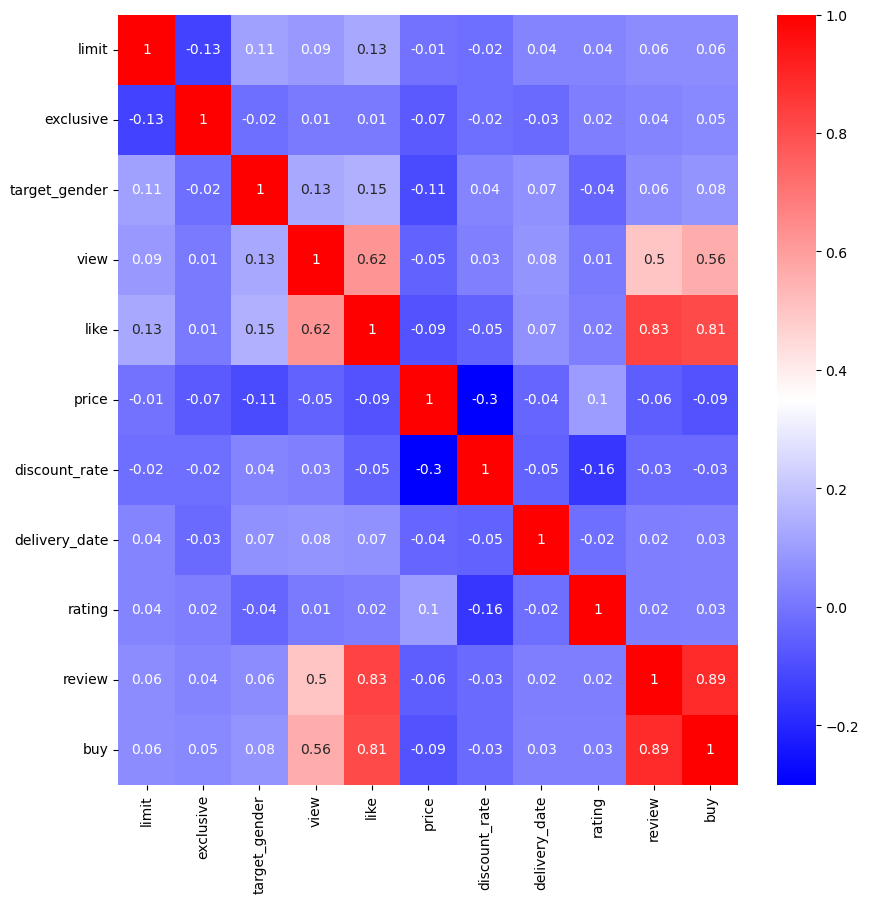

In [48]:
plt.figure(figsize=(10, 10))
correlation_matrix = df_corr.corr(numeric_only=True).round(2)
sns.heatmap(data = correlation_matrix, annot=True, cmap='bwr')

- 예측하고자 한 누적 매출량과 관계성이 있는 항목은 조회수, 좋아요, 후기가 가장 높은 관계성을 가진다

## 한정판매 여부별 1년간 누적판매량

In [49]:
# 한글깨짐 코드
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system.. sorry~~~")

plt.rcParams["axes.unicode_minus"] = False

Hangul OK in your Windows!!!


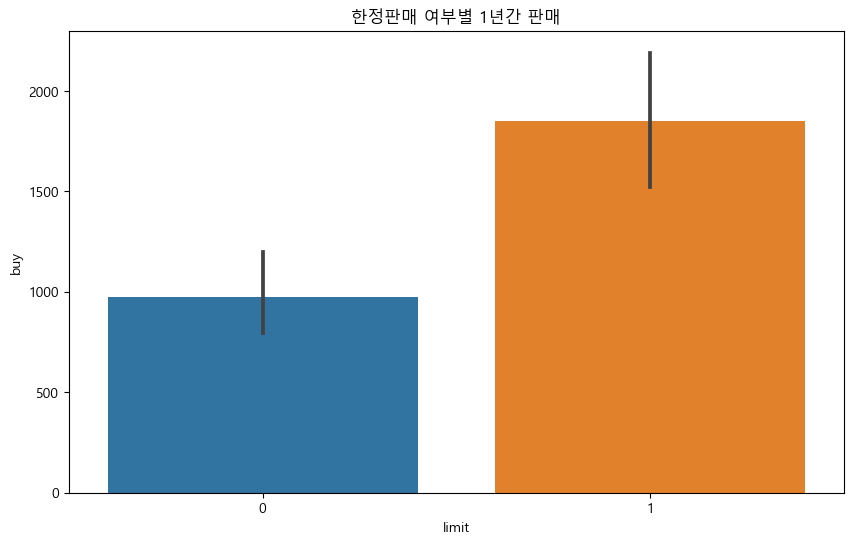

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x="limit", y="buy", data=df)
plt.title("한정판매 여부별 1년간 판매")
plt.show()

# 한정판매 X = 0
# 무신사 한정판매 O = 1

- 한정판매가 아닌 경우보다 한정판매인 경우가 누적판매량의 평균이 2배가 차이가 난다

## 단독판매별 1년간 누적판매량

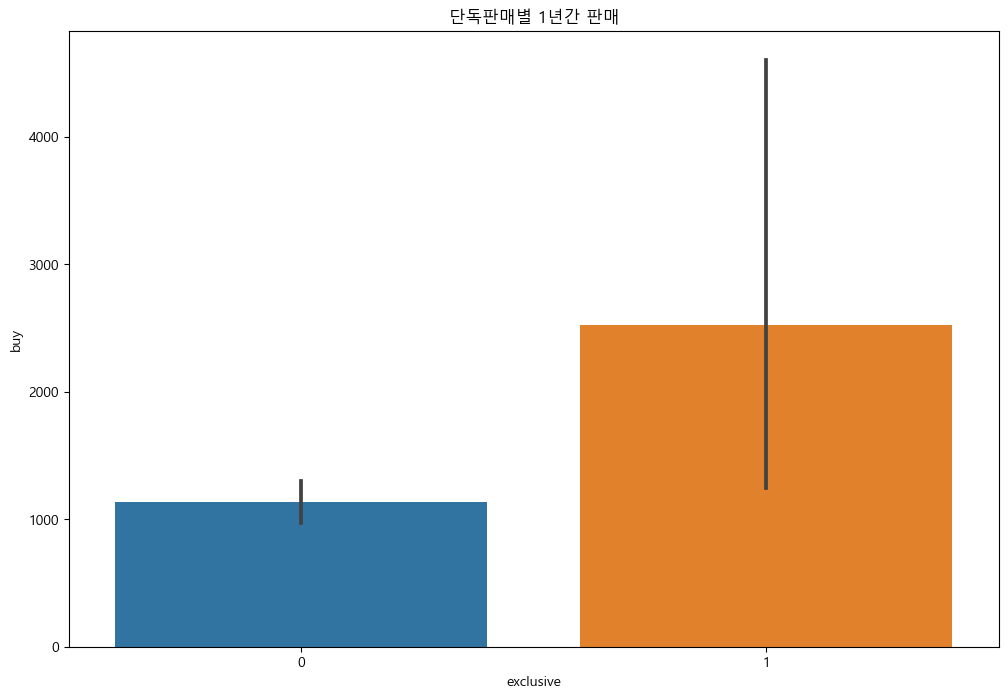

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(x="exclusive", y="buy", data=df)
plt.title("단독판매별 1년간 판매")
plt.show()
# 무신사 단독판매 = 1
# 아니면 = 0

- 단독판매가 아닌 경우보다 단독판매인 경우가 누적판매량의 평균이 2배 이상 차이가 난다

## 타겟 성별별 1년간 판매

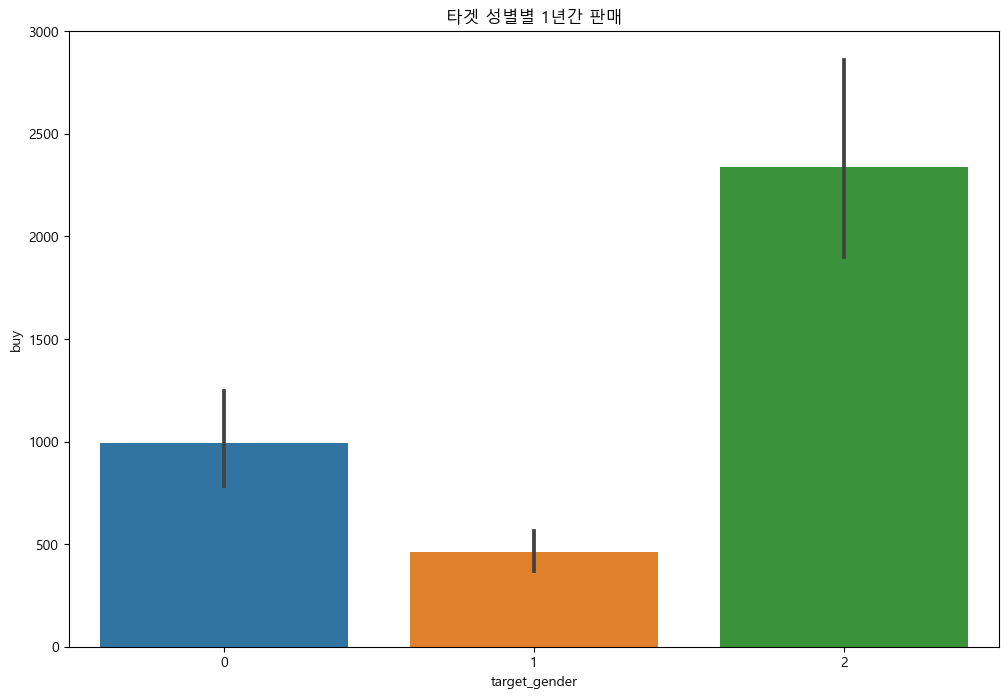

In [52]:
plt.figure(figsize=(12, 8))
sns.barplot(x="target_gender", y="buy", data=df)
plt.title("타겟 성별별 1년간 판매")
plt.show()
# 남자 = 0
# 여자 = 1
# 남/여 = 2

- 타겟 성별별 누적매출량은 남녀공용 제품이 가장 높고 여성 제품이 가장 낮다

## 조회수에 따른 1년간 판매량 현황

In [53]:
# import matplotlib as mpl

# plt.rc('font', size = 13)
# figure, ax = plt.subplots()
# figure.set_size_inches(11, 5)


# # 조회수에 따른 1년간 판매량 현황 막대그래프
# sns.barplot(x = 'view', y = 'buy', data = df)

# # 그래프 제목, x축 라벨, y축 라벨명 설정
# ax.set(title = '조회수에 따른 1년간 판매량 현황',
#        xlabel = '조회수',
#        ylabel = '1년간 막대그래프');

# plt.xticks(fontsize=5)
# plt.show();

## 평점별 1년간 판매량 현황 막대그래프

In [54]:
selected_rows = df[df['like'] <= 120000]
selected_rows_view = selected_rows[selected_rows['view'] <= 150000]


In [55]:
df['rating'].unique()

array([4.6, 4.9, 4.8, 5. , 4.7, 4.5, 4.3, 3.8, 4.4, 3.9, 2.3, 4.2, 4. ,
       4.1, 3. , 3.7, 3.6, 3.4, 2.8, 3.2, 3.5])

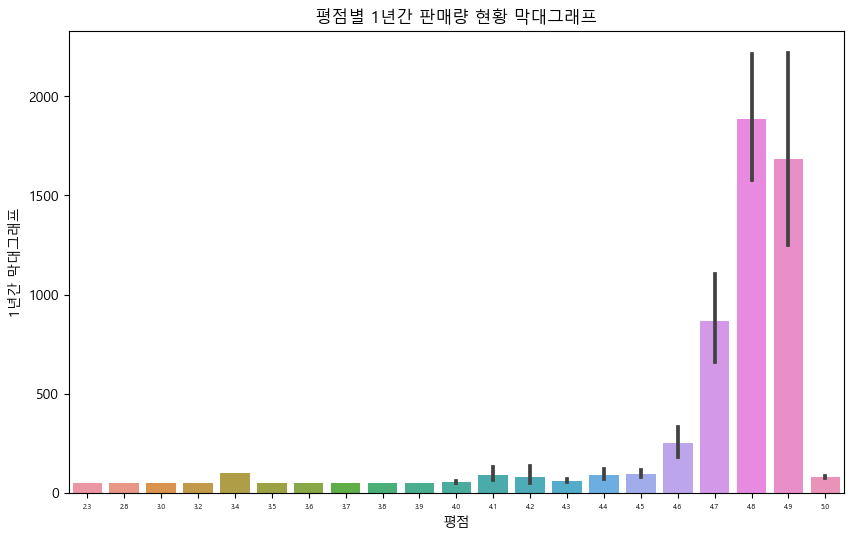

In [56]:
# 평점별 1년간 판매량 현황 막대그래프
plt.figure(figsize=(10,6))
sns.barplot(x = 'rating', y = 'buy', data = df)
# sns.pointplot(x='rating', y='buy', data=selected_rows_view, join=False, markers='o')


# 그래프 제목, x축 라벨, y축 라벨명 설정
plt.title('평점별 1년간 판매량 현황 막대그래프')
plt.xlabel('평점')
plt.ylabel('1년간 막대그래프')

plt.xticks(fontsize=5)
plt.show();

다양한 평점을 받을 수록 5점이 아닐 확률이 높고
평점이 높은 제품일 수록 판매량이 높다(평점-판매량 상관관계가 높음)

## 카테고리 변수들의 분포 확인

In [57]:
# sns.countplot(x='buy_age1', data=df)
# plt.title('Buy Age 분포')

# plt.show()
# sns.countplot(x='buy_age2', data=df)
# plt.title('Buy Age2 분포')

# plt.show()

buy_age2는 의미 없음을 확인하여 후에 제거를 진행

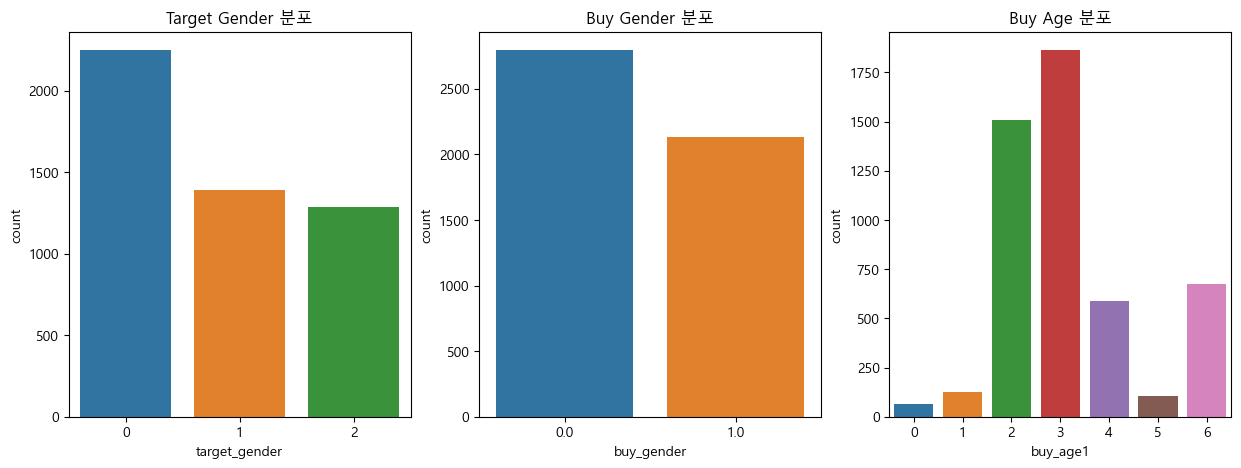

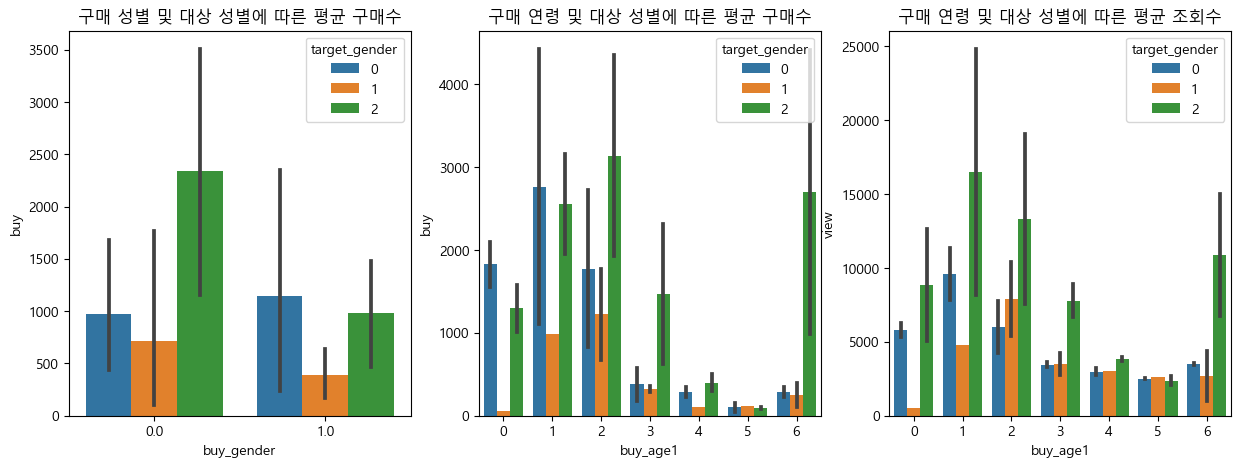

In [58]:
# 카테고리 변수들의 분포 확인
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='target_gender', data=df)
plt.title('Target Gender 분포')

plt.subplot(1, 3, 2)
sns.countplot(x='buy_gender', data=df)
plt.title('Buy Gender 분포')

plt.subplot(1, 3, 3)
sns.countplot(x='buy_age1', data=df)
plt.title('Buy Age 분포')

plt.show()

# 각 카테고리에 따른 구매율, 조회수, 좋아요 등의 평균값 확인
grouped_data = df.groupby(['target_gender', 'buy_gender', 'buy_age1']).agg({
    'buy': 'mean',
    'view': 'mean',
    'like': 'mean'
}).reset_index()

# 시각화
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='buy_gender', y='buy', hue='target_gender', data=grouped_data)
plt.title('구매 성별 및 대상 성별에 따른 평균 구매수')

plt.subplot(1, 3, 2)
sns.barplot(x='buy_age1', y='buy', hue='target_gender', data=grouped_data)
plt.title('구매 연령 및 대상 성별에 따른 평균 구매수')

plt.subplot(1, 3, 3)
sns.barplot(x='buy_age1', y='view', hue='target_gender', data=grouped_data)
plt.title('구매 연령 및 대상 성별에 따른 평균 조회수')

plt.show()





(상의, 하의, 아우터 기준)

상품에 대한 그래프
1번 그래프
- 남성을 타겟으로 한 제품이 많음

2번 그래프
- 남성이 더 선호하는 제품이 여성이 더 선호하는 제품보다 많다.

3번 그래프
- 19세-28세 사이에 고객층에서 인기 있는 제품이 많음
- 40대 이상의 경우 미성년 고객이 부모님의 아이디를 사용했을 가능성이 존재
- 이 쇼핑몰의 제품들의 매력도가 20대 후반부터는 잘 어필할 수 없음
-------------
1년간 구매 수량에 대한 그래프

4번째 그래프
- 여성도 여성 겨냥 제품보다 남자 혹은 공용제품을 더 많이 구매함
- 남성은 남성 제품보다 공용 제품을 더 많이 구매함
- 남성이 여성 제품을 구매한 경우도 적지 않음
- 남, 여가 각자 많이 구매한 제품 중에는 남자/여자를 각 겨냥한 상품보다 남녀공용 상품이 비슷하거나 많았다.


5번째 그래프
- 20대 이상의 모든 연령층에서 공용 제품 판매량이 가장 많다.
- 10대에서는 남성 타겟 제품이 가장 많다
- 여성 타겟 제품은 비교적  판매량이 떨어진다.

6번쨰 그래프
- 여성들의 경우 조회를 더 많이 하는 것에 비해 구매 전환이 떨어지는 편이다
- 남성의 경우 조회수 대비 구매 전환율이 더 잘 된다.
- 구매량과 조회수는 비례한다.

In [59]:
df_buy_age = df.copy()
df_buy_age.head()

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score,buy_age1,buy_age2
0,상의,셔츠/블라우스,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,1,0,2,0.0,"('29~33세', 0)",1200.0,493,39800.0,20,19.0,4.6,36,50.0,0.976190,4,0
1,상의,니트/스웨터,TD5-SW01 램스울 라운드 니트-만다린오렌지,TD5-SW01_MAO,1,0,0,0.0,"('29~33세', 0)",4900.0,650,53550.0,10,5.0,4.9,61,200.0,0.954545,4,0
2,상의,후드 티셔츠,[SET UP] PPP 플라워 후드 셋업_멜란지 그레이,KBCS1TH003MGKBCS1PL003MGKBCS1PS003MG,1,0,2,1.0,"('19~23세', 0)",3600.0,2536,49900.0,49,5.0,4.8,41,150.0,1.000000,2,0
3,상의,후드 티셔츠,TIE DYE 후드티 Olive Green,CTTZPHD01UG4,0,0,0,0.0,"('40세~', 0)",1000.0,569,19800.0,80,5.0,4.8,62,150.0,0.971429,6,0
4,상의,긴소매 티셔츠,essential turtleneck logo top - pink,BT23WTS002PIKF,1,0,1,1.0,"('24~28세', 0)",11000.0,2561,43000.0,0,28.0,4.8,34,100.0,0.964286,3,0


In [60]:
df_buy_age['extracted_age'] = df_buy_age['buy_age'].str.extract(r'(\d+)')
df_buy_age['extracted_age'].unique()

array(['29', '19', '40', '24', '18', '34', '0'], dtype=object)

C:\Users\user\AppData\Local\Temp\ipykernel_13784\2439430243.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



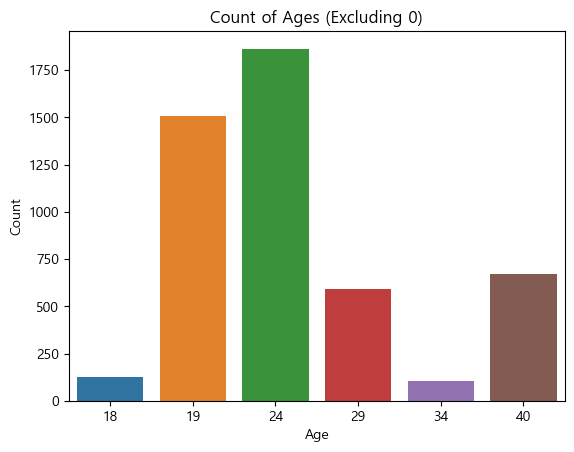

In [61]:
# 0을 제외한 값으로 필터링
filtered_data = df_buy_age[df_buy_age['extracted_age'] != '0']

# Age 값을 정수형으로 변환하여 정렬
filtered_data['extracted_age'] = filtered_data['extracted_age'].astype(int)
filtered_data = filtered_data.sort_values(by='extracted_age')

# 시각화
sns.countplot(data=filtered_data, x='extracted_age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Ages (Excluding 0)')
plt.show()

In [62]:
df_review = pd.read_csv('../1. 웹크롤링/review_240119.csv', index_col=0)
df_review.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_review


,product_names,product_ids,user_names,user_ratings,user_reviews
0,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,킴오복,80,깔끔하고 입기 편안해요 손이 자주가는 편한 느낌
1,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,web,100,오버한 사이즈고 입으면 더 예쁩니다. 부드럽고 적당한 두께감이라 겨울에 아주 잘입을...
2,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,퓨블릭a.,100,많이 길고 오버할 줄 알았는데 그렇지 않아서 좋구여 예쁩니다. 다른 색깔도 살듯..
3,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,YANGMAL2,80,굿굿 생각한거보다 이쁘네영 자주 손이가네요 추천합니다
4,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,.ㅡㅡㅡㅡㅡ.,100,살짝 얇은 원단이 아쉽지만 전체적으로 가격을 뛰어 넘는 품질입니다.
...,...,...,...,...,...
179772,레이싱 자켓,G2301JK04BK/G2301JK04IV,민이후니,100,비록 클리어런스 제품이지만 제품 자체는 덜 할인이 들어가도 구매 할 만큼 충분히 퀄...
179774,레이싱 자켓,G2301JK04BK/G2301JK04IV,Kobe-Ju,100,퀄리티좋고 배송빨라요 패키지도 잘되있어서 선물하기에도 용이해보이고 일단 착용감도 굿...
179775,레이싱 자켓,G2301JK04BK/G2301JK04IV,dossl,100,상품 잘 받았습니다 퀄리티도 괜찮아보이고 디자인도 맘에들어서 자주 사용할 것 같아요...
179777,레이싱 자켓,G2301JK04BK/G2301JK04IV,와라링,100,예쁩니다. 추천합니다 그렇지만 유일한 단점은 투웨이가 아니라는 점입니다. 더울때는 ...


In [63]:
df_buy_40 = df_buy_age[df_buy_age['extracted_age'] == '40'].copy()
df_buy_40 = df_buy_40[['middle_category','name', 'number', 'buy_age', 'extracted_age']]

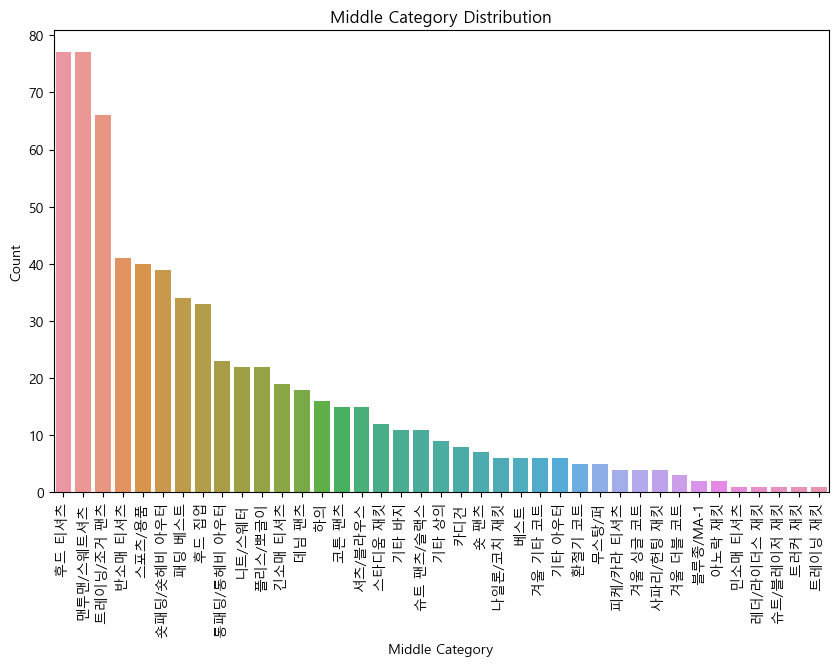

In [64]:
import matplotlib.font_manager as fm

# 시스템에 설치된 한글 폰트 경로 설정
font_path = "c:/Windows/Fonts/malgun.ttf"

# 시각화에 한글 폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터프레임의 middle_category 열에서 유니크한 값들을 추출합니다.
categories = df_buy_40['middle_category'].unique()

# 각 카테고리별로 해당 카테고리가 등장한 횟수를 세어줍니다.
category_counts = df_buy_40['middle_category'].value_counts()

# 내림차순 정렬
category_counts = category_counts.sort_values(ascending=False)

# 시각화를 위한 그래프의 크기 설정
plt.figure(figsize=(10, 6))

# seaborn의 countplot을 사용하여 막대 그래프 생성
sns.countplot(data=df_buy_40, x='middle_category', order=category_counts.index)

# x축 레이블을 90도 회전시켜 글씨가 겹치지 않도록 합니다.
plt.xticks(rotation=90)

# 그래프 제목과 축 레이블 추가
plt.title('Middle Category Distribution')
plt.xlabel('Middle Category')
plt.ylabel('Count')

# 그래프를 표시합니다.
plt.show()

In [65]:
# df_buy_40와 df_review를 'number'와 'product_ids'를 기준으로 병합
merged_df = pd.merge(df_buy_40, df_review, left_on='number', right_on='product_ids', how='inner')

# 'user_reviews' 열만 선택하여 조회
user_reviews = merged_df['user_reviews']
print(user_reviews)

0        세일해서 산간데 생각보다 괜찮네요! 180레 95인데 오버핏은 아니고 딱 맞는 느낌이에요
1            오버핏으로 나왔겠지만 한사이즈 작은거로 구입하니 딱맞네요 더 큰걸사고싶었지만 품절
2                              가격대비 최곱니다착용감이 좋아요재질이 너무 좋아요
3        색깔 제가좋아하는 색이라 너무 이쁩니다세력되 보이고  선명합니다~~^^L가 다른브랜...
4        찬바람 불기 시작하면 아주 좋은아이템이 될듯...정상가보고 허걱했지만착한가격으로 살...
                               ...                        
17420    후기에 있던대로 여자분들은 무조건 스몰 사셔야합니다!!!어깨가 각져있어서 더 커보이...
17421             넉넉하게 입을려고 했는데 여자가 입기에는 어깨가 생각보다 너무 크네요ㅠㅠ
17422             배송도 빠르고 세일해서 저렴하게 잘 샀어요간절기에 꼭 필요한 아이템입니다
17423          후기가 없어서 고민했는데 예쁘네요 카키도 샀는데 아이보리도 있으면 좋을것같아요
17424                           색감 iPhone 13 P3 화면보단 약간 밝음
Name: user_reviews, Length: 17425, dtype: object


In [66]:
df_buy_40['number'].unique()

array(['CTTZPHD01UG4', 'MSD4TR2007', 'NV22F004GR', 'MWATK508-BK',
       'MG2303HD51LG', 'MG2CFMT551FWH', 'G(M)-PMG(23)-38-BK', 'IM2088',
       'EB2203CR42LG', 'CO2303HD01OT', 'HL9110', 'ASCTSL002_2',
       '5006639581', 'CBCFWTL106MGCBCFWTP106MG', 'CTTZPHD09UG5',
       '5003416747', 'LE2303HD01GR', '5004507915', 'STHD-9884',
       'PC6CR0061GR', '023936', 'Overfit Attire Pocket Sweat Shirt',
       'ZC11QK026ON', 'AD105', 'SDHCT14B_3', 'P00000FT', 'GB20052',
       'ADLV-21SS-HDBKBF-D1R', 'T3048252SS22', 'FA4UTS321',
       '1MG23FHD103BGD', 'B-TOP-0003-CAMEL', 'LATS0104S2', 'PNES23KE0302',
       'GK4THU002NA', 'JN6TSU505MW', 'PHC4TR2020', 'SET0028',
       '35-03-0078', 'P1T3211SS23', 'EB2201SH05LB', 'FCD3TS708W_RD',
       '5007602632', 'R2ST06-A1', 'LE2301LT01LG', 'TSH9520029',
       'CO2301CR11OT', 'BIFMSTT01WT', 'MG2304CR01BK', 'JT24', 'IA3932',
       'MG2303KT52IV', 'IK2DSMM410AOM', '5004513569', 'AMM1107',
       'GTS-15044', 'CBCFWTL106OTCBCFWTP106OT', 'CO2301HD02OT',
 

In [67]:
merged_df[merged_df['number'] == 'TRSHT04NV']

,middle_category,name,number,buy_age,extracted_age,product_names,product_ids,user_names,user_ratings,user_reviews
2816,후드 티셔츠,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,"('40세~', 0)",40,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,김어만,100,핏 이쁘고 재질도 보들보들 하고 몸판이랑 모자 색 다른게 맛있네요 ㅋ
2817,후드 티셔츠,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,"('40세~', 0)",40,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,MongL,80,탄탄한 해비웨이트는 아니고 얇고 가벼운 재질이에요 재질이 좋은건 아니지만 가성비로 ...
2818,후드 티셔츠,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,"('40세~', 0)",40,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,kim.sg,100,색감이 실제로보니 훨씬 예쁜것같아요 맘에듭니당
2819,후드 티셔츠,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,"('40세~', 0)",40,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,뉴비_e4b4eab8a0f2,100,진짜 너무너무 최고입니다 ㅠㅠ 제가 룩핀을 사용하다 제가 상체랑 하체 비율이 3:7...
2820,후드 티셔츠,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,"('40세~', 0)",40,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,뉴비_51897408,100,기본 후드티로 편하게 입기 좋아요.입었을때 기장이 조금 긴듯하지만 넘 마음에듭니다.
2821,후드 티셔츠,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,"('40세~', 0)",40,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,뉴비_90e3cd1f,100,예쁨! 모자 흰색인게 포인트고 핏도예쁘게 잘떨어짐
2822,후드 티셔츠,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,"('40세~', 0)",40,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,kilo99,100,두터워서 늦가을까지 입을 수 있을것같네요!사이즈 그냥 아주 넉넉합니다
2823,후드 티셔츠,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,"('40세~', 0)",40,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,뉴비_acde2844ca60,100,디자인도 예쁘고 산뜻해 보여요. 아이가 학원갈때 아우터 대용으로 입고 나갑니다!
2824,후드 티셔츠,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,"('40세~', 0)",40,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,뉴비_8c17e23e,100,살짝 오버핏이어서 한 사이즈 작게 사도 괜찮았을듯ㅎㅎ 근데 너무 이뻐요 많이 파세요
2825,후드 티셔츠,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,"('40세~', 0)",40,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,뉴비_0facf5e5f767,100,사이즈도 오버핏으로 핏이 예쁘게 떨어지고 색도 봄이랑 어울려서 맘에듭니다


## 누적판매량과 수치형 컬럼간의 선형 관계 확인

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



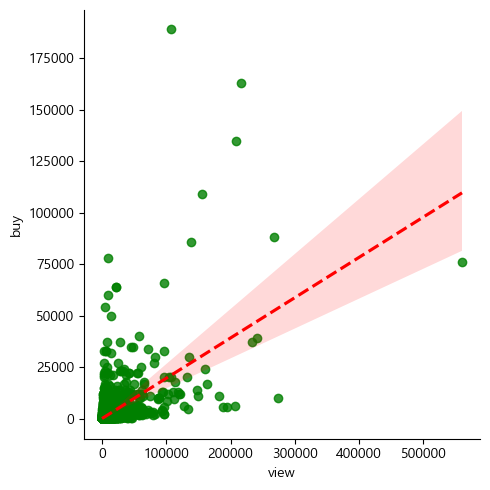

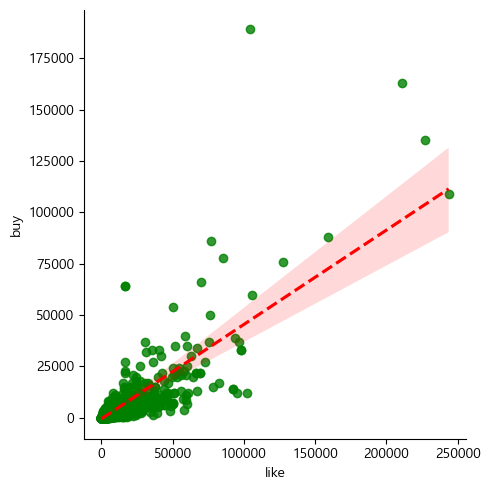

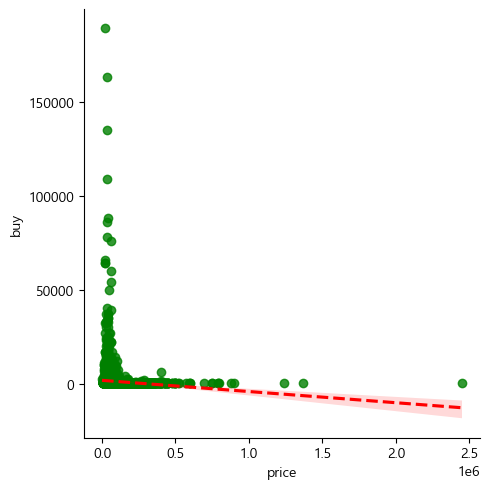

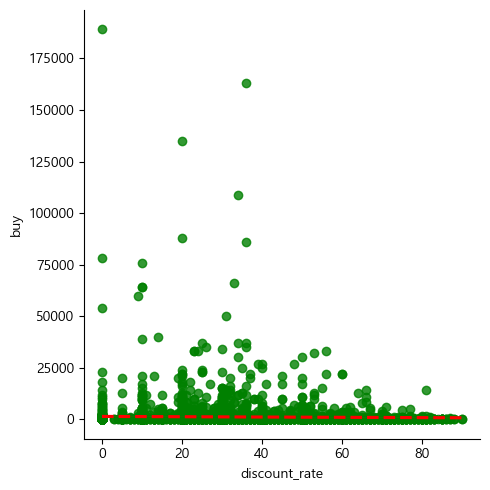

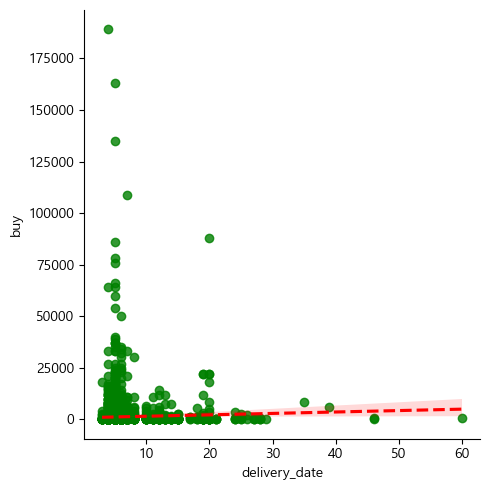

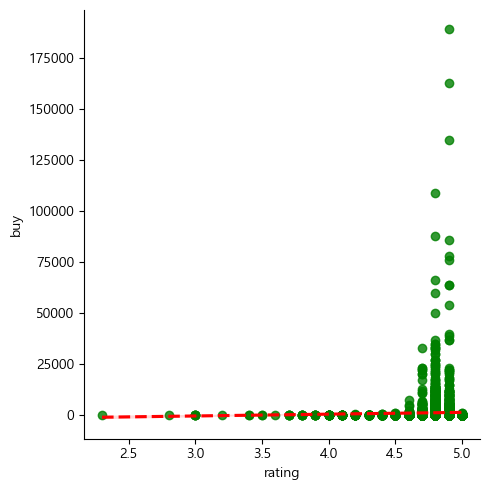

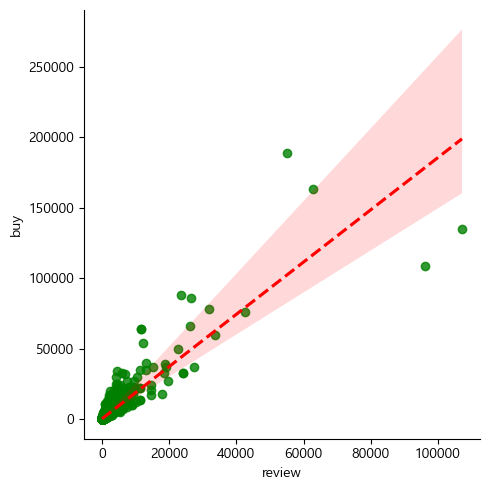

In [68]:
sns.lmplot(x='view', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='like', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='price', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='discount_rate', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='delivery_date', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='rating', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='review', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})


- buy, view도 양의 상관관계가 있음
- buy, like은 양의 상관관계
- price는 음의 방향이나 영향이 거의 없음
- discount_rate는 영향이 거의 없음 오차 범위가 넓은 편(모델링에서삭제 요망)
- delivery_date는 생각보다 영향이 없었으나 현상만으로 봤을 떄는 판매가 많이 일어나는 제품들의 경우 배송일이 10일 이내인 제품들이 많다.(예약판매 제거 요망)
- rating의 경우 평점이 낮은 제품들이 구매가 적은 경향이 있다.

In [69]:
# # 이상치 발견해서 수정
# df.loc[df.review == 81354, :] = 100000
# df[df.review >= df.buy]

### 구매전환율과 리뷰작성전환율 컬럼 추가

In [70]:
# 구매전환율 = 구매수 / 조회수
df['buy_cvr'] = round(df['buy'] / df['view'], 2)

In [71]:
# 리뷰작성전환율 = 리뷰 작성 / 구매수
df['review_cvr'] = round(df['review'] / df['buy'], 2)

In [72]:
df.head()

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,...,discount_rate,delivery_date,rating,review,buy,score,buy_age1,buy_age2,buy_cvr,review_cvr
0,상의,셔츠/블라우스,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,1,0,2,0.0,"('29~33세', 0)",1200.0,...,20,19.0,4.6,36,50.0,0.976190,4,0,0.04,0.72
1,상의,니트/스웨터,TD5-SW01 램스울 라운드 니트-만다린오렌지,TD5-SW01_MAO,1,0,0,0.0,"('29~33세', 0)",4900.0,...,10,5.0,4.9,61,200.0,0.954545,4,0,0.04,0.30
2,상의,후드 티셔츠,[SET UP] PPP 플라워 후드 셋업_멜란지 그레이,KBCS1TH003MGKBCS1PL003MGKBCS1PS003MG,1,0,2,1.0,"('19~23세', 0)",3600.0,...,49,5.0,4.8,41,150.0,1.000000,2,0,0.04,0.27
3,상의,후드 티셔츠,TIE DYE 후드티 Olive Green,CTTZPHD01UG4,0,0,0,0.0,"('40세~', 0)",1000.0,...,80,5.0,4.8,62,150.0,0.971429,6,0,0.15,0.41
4,상의,긴소매 티셔츠,essential turtleneck logo top - pink,BT23WTS002PIKF,1,0,1,1.0,"('24~28세', 0)",11000.0,...,0,28.0,4.8,34,100.0,0.964286,3,0,0.01,0.34


### barplot이 합계나 평균을 잘 나타주는 반면 boxplot은 중앙값, 이상치, 데이터의 분포를 파악하는 데 도움이 됩니다.

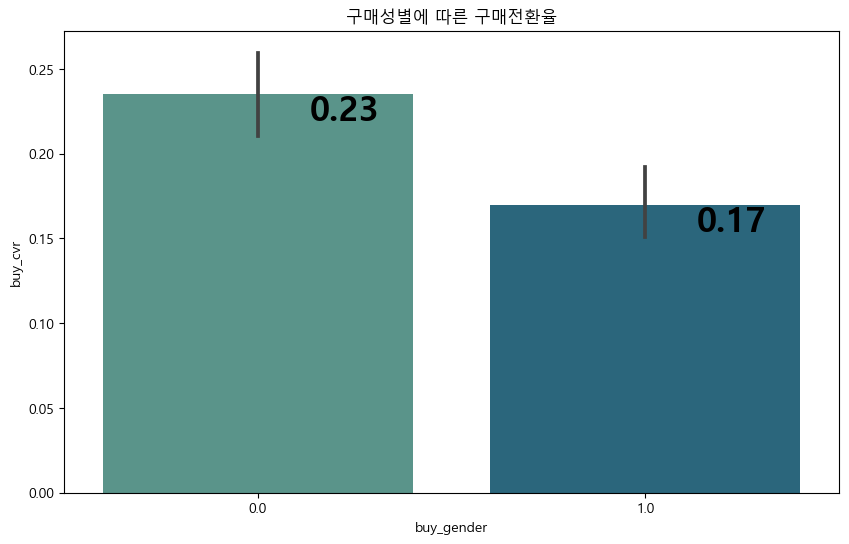

In [103]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='buy_gender', y='buy_cvr', data=df, palette='crest')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 1.5, # x 좌표
            p.get_y() + p.get_height() , # y 좌표
            f"{p.get_height():.2f}", # 값
            va='top',  # 상단 정렬
            fontsize=25,  # 텍스트 폰트 크기
            fontweight='bold') # 가운데 정렬
plt.title("구매성별에 따른 구매전환율")
plt.show()

- 남성의 구매전환율이 여성의 구매전환율보다 0.07% 정도 더 높다.
- 여성이 남성보다 실제 구매를 하기까지 시간 또는 더 많은 상품을 둘러본다고 볼 수 있다.

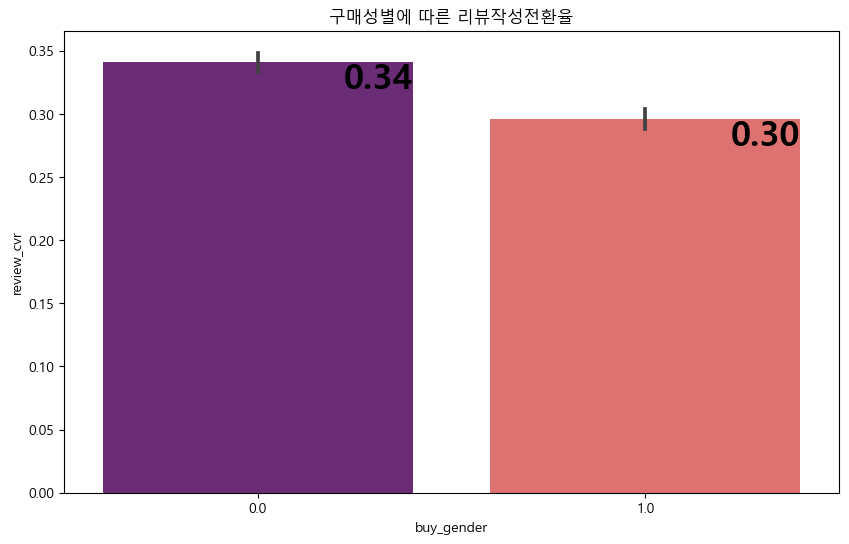

In [97]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='buy_gender', y='review_cvr', data=df, palette='magma')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width(),  # x 좌표
            p.get_y() + p.get_height(),  # y 좌표
            f"{p.get_height():.2f}",  # 값
            ha='right',  # 우측 정렬
            va='top',  # 상단 정렬
            fontsize=25,  # 텍스트 폰트 크기
            fontweight='bold')  # 텍스트 굵게 설정
plt.title("구매성별에 따른 리뷰작성전환율")
plt.show()

- 남성의 리뷰작성전환율이 여성의 리뷰작성전환율보다 0.04% 더 높다.
- 남성이 여성의 경우보다 리뷰 작성에 좀 더 긍정적이거나 아주 조금 더 성실하다고 볼 수 있다.

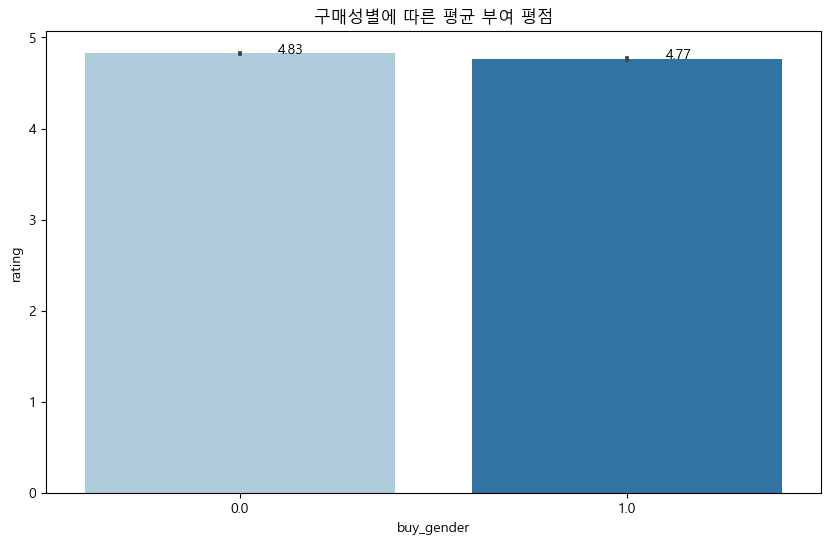

In [75]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='buy_gender', y='rating', data=df, palette='Paired')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 1.5, # x 좌표
            p.get_y() + p.get_height() , # y 좌표
            f"{p.get_height():.2f}", # 값
            ha='center') # 가운데 정렬
plt.title("구매성별에 따른 평균 부여 평점")
plt.show()

- 남녀 모두 구매한 상품에 대한 평균 만족도는 4.7점 이상으로, 높은 만족을 하고 있음을 알 수 있다.

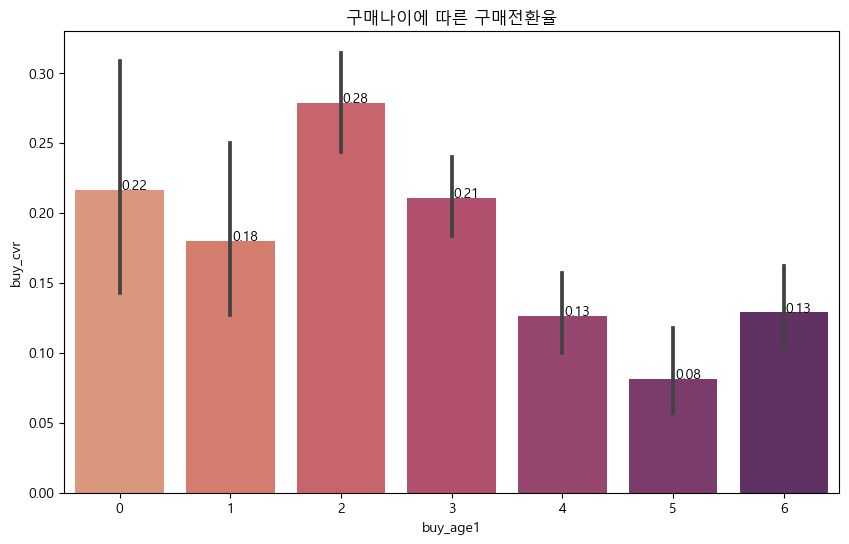

In [76]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='buy_age1', y='buy_cvr', data=df, palette='flare')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 1.5, # x 좌표
            p.get_y() + p.get_height() , # y 좌표
            f"{p.get_height():.2f}", # 값
            ha='center') # 가운데 정렬
plt.title("구매나이에 따른 구매전환율")
plt.show()

- 구매 전환율을 10대 후반에서 20대 초반이 가장 높고, 이후로 점점 떨어지다가 40세 이상에서 다시 상승하는 양상을 보인다.
- 40세 이상의 경우, 쇼핑몰의 이미지와 특성 상 부모님의 계정을 이용한 자녀일 가능성이 있기 때문에 10대로 해석할 수 있는 여지가 있다.

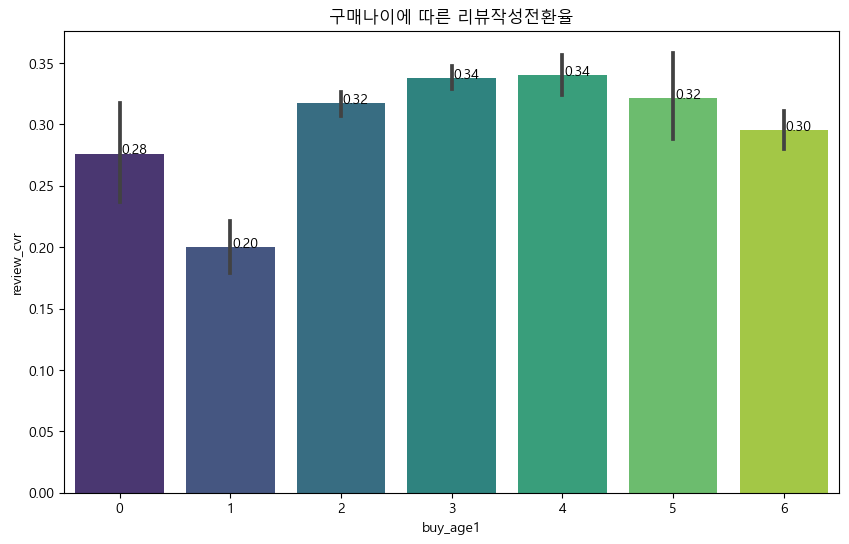

In [77]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='buy_age1', y='review_cvr', data=df, palette='viridis')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 1.5, # x 좌표
            p.get_y() + p.get_height() , # y 좌표
            f"{p.get_height():.2f}", # 값
            ha='center') # 가운데 정렬
plt.title("구매나이에 따른 리뷰작성전환율")
plt.show()

- 재미있는 사실은 구매 나이에 따른 리뷰작성전환율은 구매 나이에 따른 구매전환율과 다소 상반되는 그래프를 그린다는 것이다.
- 리뷰 작성은 10대를 제외하고 대부분 비슷한 것을 확인하였다.

In [78]:
df[df['buy']<10000].shape

(4803, 22)

In [79]:
fig = px.histogram(df[df['buy']<10000], x='buy', nbins=10)
fig.show()